In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
with open("/kaggle/input/bengali-news-summarization-dataset/Bengali-News-Summarization-Dataset/article.txt", "r") as f:
    articles = f.read().splitlines()
    
    
with open("/kaggle/input/bengali-news-summarization-dataset/Bengali-News-Summarization-Dataset/summary.txt", "r") as f:
    summaries = f.read().splitlines()

In [3]:
df = pd.DataFrame(list(zip(articles,summaries)),columns=["article","summary"])

In [4]:
df

,article,summary
0,স্ট্যান্ডার্ড চার্টার্ড ব্যাংকের নতুন প্রধান ন...,স্ট্যান্ডার্ড চার্টার্ডের নতুন সিইও আবরার
1,রাজধানী থেকে চামড়া শিল্পগুলো সাভারে স্থানান্তর...,মার্চের মধ্যে সাভারে চামড়া শিল্পের সিইটিপি: মন...
2,দেশীয় শিল্প বিকাশে সরকারের সব ধরনের উদ্যোগ অব্...,ওয়ালটন কারখানায় শিল্পমন্ত্রী
3,একীভূত হতে চলেছে অনলাইনে শ্রেণিবদ্ধ বিজ্ঞাপন স...,একীভূত হচ্ছে এখানেই ডটকমওএলএক্স
4,যাত্রীবাহী একটি বাসে আগুন দেওয়ার আধা ঘণ্টার মধ...,বাসে আগুন: নড়াইলের পৌর মেয়র গ্রেপ্তার
...,...,...
19091,মাঝারি থেকে দূরপাল্লার ক্ষেপণাস্ত্রের সফল পরীক...,যেকোনও সময় ফের ক্ষেপণাস্ত্র পরীক্ষার হুমকি উত্...
19092,বিশ্বকবি রবীন্দ্রনাথ ঠাকুরের ১৫৬তম ও জাতীয় কবি...,আবুধাবিতে রবীন্দ্রনজরুল জন্মজয়ন্তী পালন
19093,এশিয়ান কন্টিনেন্টাল দাবা চ্যাম্পিয়নশিপের চতুর্...,চীনে রাজীব ও লিজার ড্র
19094,শাখার পূর্ণাঙ্গ কমিটি করতে না পারার জন্য বড় ভা...,বড় ভাইদের দাবি মেটাতে হিমশিম ছাত্রলীগ


In [5]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.30, shuffle=True)
df_val, df_test = train_test_split(df_test, test_size=0.65,shuffle=True)

In [6]:
df_train.head()

,article,summary
18055,জাতীয় বিশ্ববিদ্যালয়ের স্নাতকোত্তর ডিপ্লোমা এবং...,জাতীয় বিশ্ববিদ্যালয়ে মাস্টার্সে ভর্তির আবেদন ৯ মে
11098,"পরমাণু শক্তির শান্তিপূর্ণ ব্যবহার, উন্নয়ন ও প্...",পরমাণু শক্তি কমিশন বিল সংসদে
15085,ক্যান্সার আক্রান্ত কিংবদন্তী শিল্পী লাকী আখন্দ...,বুধবার আসছে লাকী আখন্দের মিউজিক ভিডিও
16322,যুদ্ধাপরাধী জামায়াত নেতা মতিউর রহমান নিজামীর ফ...,তিনমাস পর ঢাকায় ফিরলেন তুরস্কের রাষ্ট্রদূত
3788,সুপ্রিম কোর্টের পরিবেশ ঠিক রাখতে জ্যেষ্ঠ আইনজী...,পরিবেশ ঠিক রাখতে আইনজীবীদের সঙ্গে প্রধান বিচার...


In [7]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

def visualize_text_length(data, title):

    data['News_article_text_length'] = data['article'].apply(len)
    data['News_summary_text_length'] = data['summary'].apply(len)

   
    plt.figure(figsize=(8, 4))

    
    custom_font = FontProperties(family='serif', style='normal', size=14, weight='bold')

    
    plt.subplot(1, 2, 1)
    plt.hist(data['News_article_text_length'], bins=40, color='cornflowerblue', edgecolor='black', alpha=0.7, label='Bangla News Article')
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("Bangla News Article Text Length", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')

    
    plt.subplot(1, 2, 2)
    plt.hist(data['News_summary_text_length'], bins=40, color='firebrick', edgecolor='black', alpha=0.7, label='Bangla News Summary')
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("News Summary Text Length", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequency", fontsize=10, fontproperties=custom_font, color='black')

    
    plt.suptitle(f'Text Length Distribution for {title}', fontsize=12, fontproperties=custom_font, color='black')
    
    plt.tight_layout()

    # Show the plot
    plt.show()



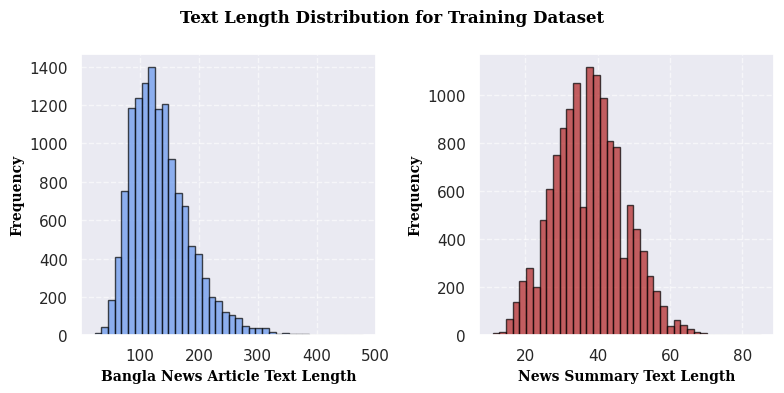

In [8]:
visualize_text_length(df_train, 'Training Dataset')

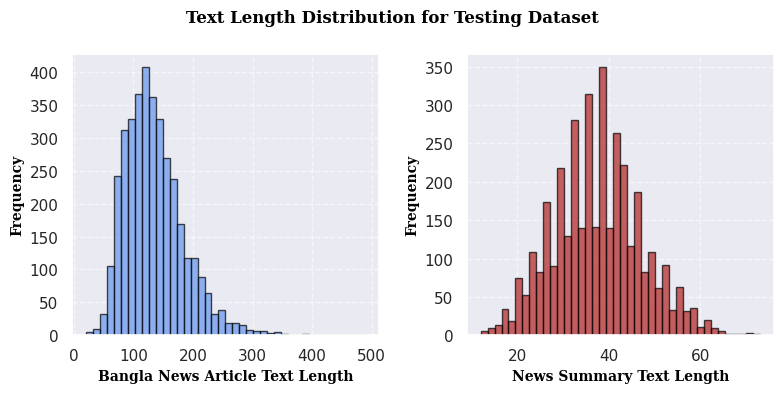

In [9]:
visualize_text_length(df_test, 'Testing Dataset')

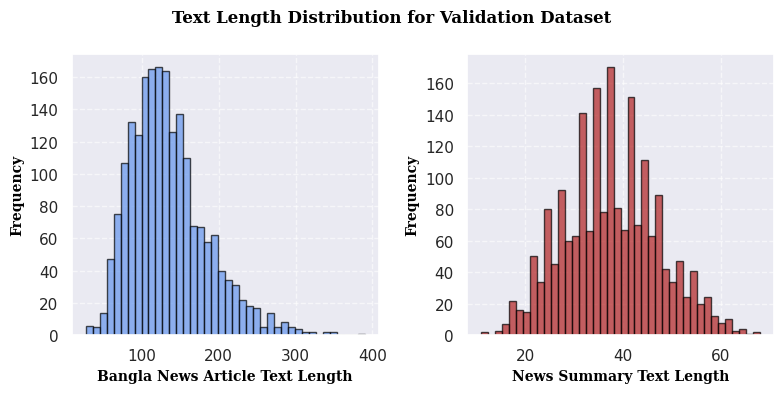

In [10]:
visualize_text_length(df_val, 'Validation Dataset')

In [11]:
!pip install git+https://github.com/csebuetnlp/normalizer

  Cloning https://github.com/csebuetnlp/normalizer to /tmp/pip-req-build-c_nzlxlz
  Running command git clone --filter=blob:none --quiet https://github.com/csebuetnlp/normalizer /tmp/pip-req-build-c_nzlxlz
  Resolved https://github.com/csebuetnlp/normalizer to commit d405944dde5ceeacb7c2fd3245ae2a9dea5f35c9
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for normalizer: filename=normalizer-0.0.1-py3-none-any.whl size=6859 sha256=59402e901cf2aa95678dce415e2a3dc5799d0d3d090f6f0cc2a3675705381f4f
  Stored in directory: /tmp/pip-ephem-wheel-cache-haodlr0w/wheels/2e/79/9c/cd96d490298305d51d2da11484bb2c25fd1f759a6906708282
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186460 sha256=3188bc4c2f2d044e5e2772682458e72c6019684d

In [12]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
from normalizer import normalize

In [13]:
import torch
from normalizer import normalize
from transformers import AutoTokenizer, AutoModelForTokenClassification ,DataCollatorForSeq2Seq, Trainer, TrainingArguments
import os
from transformers import pipeline
from transformers import MT5ForConditionalGeneration, AutoTokenizer
model_name = "google/mt5-small" 
model = MT5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

2024-07-11 17:56:48.054708: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 17:56:48.054836: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 17:56:48.179090: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/opt/conda/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:562: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [14]:
from torch.utils.data import Dataset, DataLoader
class Seq2SeqDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=128):
        self.input_text = data['article'].apply(normalize).tolist()
        self.labels = data['summary'].apply(normalize).tolist()
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.input_text)

    def __getitem__(self, idx):
        input_text = self.input_text[idx]
        label_text = self.labels[idx]

        # Tokenize the input text
        input_encodings = self.tokenizer(
            input_text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        # Tokenize the label text to get its 'input_ids' and 'attention_mask'
        label_encodings = self.tokenizer(
            label_text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': input_encodings['input_ids'].squeeze(),
            'attention_mask': input_encodings['attention_mask'].squeeze(),
            'labels': label_encodings['input_ids'].squeeze(),
        }

In [15]:
# Modify the data collation process to handle PyTorch tensors correctly
class MyDataCollatorForSeq2Seq(DataCollatorForSeq2Seq):
    def __call__(self, features):
        batch = {}
        batch["input_ids"] = torch.stack([feature["input_ids"] for feature in features])
        batch["attention_mask"] = torch.stack([feature["attention_mask"] for feature in features])

        # Labels should be processed differently for PyTorch tensors
        if isinstance(features[0]["labels"], torch.Tensor):
            batch["labels"] = torch.stack([feature["labels"] for feature in features])
        else:
            # Convert the list of lists to a PyTorch tensor
            batch["labels"] = torch.tensor([feature["labels"] for feature in features])

        return batch

In [16]:
# Create train , test and validation datasets
train_dataset = Seq2SeqDataset(df_train, tokenizer)
test_dataset = Seq2SeqDataset(df_test, tokenizer)
validation_dataset = Seq2SeqDataset(df_val, tokenizer)

# Create train , test and validation dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)  
test_dataloader = DataLoader(test_dataset, batch_size=16) 
validation_dataloader = DataLoader(validation_dataset, batch_size=16)


In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [18]:
# Create a custom optimizer using torch.optim.AdamW
custom_optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=1e-3,
    eps=1e-8,
    weight_decay=0.01,
)

In [19]:
# Define the TrainingArguments for fine-tuning
training_args = TrainingArguments(
    output_dir='/kaggle/working/',
    num_train_epochs=15,
    per_device_train_batch_size=10,
    gradient_accumulation_steps=8,
    evaluation_strategy="epoch",
    save_total_limit=1,
    save_steps=5000,
    learning_rate=1e-3,
    do_train=True,
    do_eval=True,
    remove_unused_columns=False,
    push_to_hub=False,
    report_to="none",
    load_best_model_at_end=False,
    lr_scheduler_type="cosine_with_restarts",
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='/kaggle/working/',
    logging_steps=200,
    
)


/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [20]:
# Create a data collator for sequence-to-sequence tasks
data_collator = MyDataCollatorForSeq2Seq(
    tokenizer=tokenizer,
    model=model,
    padding=False,
    max_length=80,
    label_pad_token_id=tokenizer.pad_token_id,
)

In [21]:
# Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    optimizers=(custom_optimizer, None),
)

In [22]:
trainer.train()

Epoch,Training Loss,Validation Loss
0,No log,0.785012
1,9.910100,0.447467
2,0.569500,0.260704
3,0.347600,0.232215
4,0.266100,0.223932
5,0.241500,0.218843
6,0.241500,0.210011
8,0.211000,0.207838
9,0.202100,0.206245
10,0.194300,0.206783


TrainOutput(global_step=2505, training_loss=1.023421903903375, metrics={'train_runtime': 5500.5255, 'train_samples_per_second': 36.452, 'train_steps_per_second': 0.455, 'total_flos': 2.648480764133376e+16, 'train_loss': 1.023421903903375, 'epoch': 14.988780852655198})

In [23]:
!pip install datasets
!pip install python-Levenshtein
!pip install jiwer
!pip install rouge-score
!pip install evaluate

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 64.9 MB/s eta 0:00:00:00:01


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=85bef8744e343ec1ae818264afbfe17c70791571836fb1b3f2fa69b7b96c244c
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.7 MB/s eta 0:00:00


In [24]:
model.to(device)

MT5ForConditionalGeneration(
  (shared): Embedding(250112, 512)
  (encoder): MT5Stack(
    (embed_tokens): Embedding(250112, 512)
    (block): ModuleList(
      (0): MT5Block(
        (layer): ModuleList(
          (0): MT5LayerSelfAttention(
            (SelfAttention): MT5Attention(
              (q): Linear(in_features=512, out_features=384, bias=False)
              (k): Linear(in_features=512, out_features=384, bias=False)
              (v): Linear(in_features=512, out_features=384, bias=False)
              (o): Linear(in_features=384, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 6)
            )
            (layer_norm): MT5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): MT5LayerFF(
            (DenseReluDense): MT5DenseGatedActDense(
              (wi_0): Linear(in_features=512, out_features=1024, bias=False)
              (wi_1): Linear(in_features=512, out_features=1024, bias=False)
          

In [25]:
import torch
import Levenshtein
from evaluate import load
# Define the move_to_device function
def move_to_device(batch, device):
    if isinstance(batch, torch.Tensor):
        return batch.to(device)
    elif isinstance(batch, list):
        return [move_to_device(item, device) for item in batch]
    elif isinstance(batch, dict):
        return {key: move_to_device(value, device) for key, value in batch.items()}
    else:
        return batch  # If it's not a tensor, list, or dict, leave it as is

# Load the evaluation metric for Character Error Rate (CER) and Word Error Rate (WER) and Exact Match(em)
cer_metric = load("cer")
wer_metric = load("wer")

exact_match_metric = load("exact_match")

# Load BLEU and ROUGE metrics
bleu_metric = load("bleu")
rouge_metric = load('rouge')

# Initialize lists to store generated summarisaions and references
generated_summarisaions = []
references = []

# Generate summarisaions for the test dataset
for batch in test_dataloader:
    # Move the batch to CUDA
    batch = move_to_device(batch, 'cuda')

    input_text = batch['input_ids']  # Access the input_text using the correct key
    labels = batch['labels']  # Access the labels using the correct key

    # Generate summarisaions
    summarisaion_ids = model.generate(input_text, max_length=512, num_beams=4, length_penalty=2.0, early_stopping=True)

    # Move the summarisaion_ids to CPU to decode
    summarisaion_ids = summarisaion_ids.to('cpu')

    generated_summarisaion = tokenizer.batch_decode(summarisaion_ids, skip_special_tokens=True)

    generated_summarisaions.extend(generated_summarisaion)
    references.extend(tokenizer.batch_decode(labels, skip_special_tokens=True))  # Decoding the label IDs

# Make sure to move generated_summarisaions back to CPU for evaluation if necessary
generated_summarisaions = [summarisaion if not isinstance(summarisaion, str) else summarisaion for summarisaion in generated_summarisaions]



In [26]:
print("Number of generated summarisaions:", len(generated_summarisaions))
print("Number of references:", len(references))

Number of generated summarisaions: 3724
Number of references: 3724


In [27]:
# Calculate Character Error Rate (CER) and Word Error Rate (WER)
results_CER = cer_metric.compute(predictions=generated_summarisaions, references=references)
results_WER = wer_metric.compute(predictions=generated_summarisaions, references=references)

# Calculate Exact Match (EM)
results_em = exact_match_metric.compute(predictions=generated_summarisaions, references=references)


# Calculate Bilingual Evaluation Understudy (BLEU)
results_bleu = bleu_metric.compute(predictions=generated_summarisaions, references=references)


# Calculate Levenshtein Distance
levenshtein_distances = [Levenshtein.distance(generated, reference) for generated, reference in zip(generated_summarisaions, references)]


In [28]:
print(results_CER)
print(results_WER)
print(results_em)
print(results_bleu)

0.6972737506729969
0.8927173061863743
{'exact_match': 0.02309344790547798}
{'bleu': 0.11089679360078629, 'precisions': [0.3345841959972395, 0.1525693730729702, 0.07524148449415353, 0.039377289377289376], 'brevity_penalty': 1.0, 'length_ratio': 1.0918338513704435, 'translation_length': 23184, 'reference_length': 21234}
